# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [3]:
cities

['masterton',
 'port-aux-francais',
 'jackson',
 'filingue',
 'mersa matruh',
 'iqaluit',
 'nago',
 'caleta de carquin',
 'olonkinbyen',
 'san antonio de pale',
 'sinabang',
 'greytown',
 'kingston',
 'labytnangi',
 'papatowai',
 'bilibino',
 'weno',
 'dudinka',
 'wailua homesteads',
 'bethel',
 'blackmans bay',
 'ribeira grande',
 'hithadhoo',
 'tiksi',
 'adamstown',
 'lorengau',
 'tchintabaraden',
 'tazovsky',
 'mcdonough',
 'znamenskoye',
 'pemangkat',
 'hadibu',
 'waitangi',
 'erenhot',
 'taiohae',
 'egilsstadir',
 'treinta y tres',
 'port mathurin',
 "samus'",
 'hermanus',
 'albany',
 'puerto natales',
 'johnstown',
 'ulundi',
 'glace bay',
 'taiyuan',
 'leh',
 'avarua',
 'mejit',
 'namibe',
 'saipan',
 'west island',
 'acaponeta',
 'grytviken',
 'mili',
 'enewetak',
 'nantucket',
 'karpinsk',
 'zhanaozen',
 'kingscliff',
 'touros',
 'duyun',
 'duba',
 'longyearbyen',
 'college',
 'ubatuba',
 "nar'yan-mar",
 'edinburgh of the seven seas',
 'al ghayzah',
 'machico',
 'carnarvon',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = 'metric' # get temperature in Celcius
    city_url = f'{url}q={city}&appid={weather_api_key}&units={units}'
    city_json = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_json["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]
        
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | masterton
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | jackson
Processing Record 4 of Set 1 | filingue
Processing Record 5 of Set 1 | mersa matruh
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | nago
Processing Record 8 of Set 1 | caleta de carquin
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | sinabang
Processing Record 12 of Set 1 | greytown
Processing Record 13 of Set 1 | kingston
Processing Record 14 of Set 1 | labytnangi
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | weno
Processing Record 18 of Set 1 | dudinka
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | ribeira grande


Processing Record 37 of Set 4 | kodiak
Processing Record 38 of Set 4 | mogocha
Processing Record 39 of Set 4 | le port
Processing Record 40 of Set 4 | palikir - national government center
Processing Record 41 of Set 4 | hemsby
Processing Record 42 of Set 4 | vilyuysk
Processing Record 43 of Set 4 | anloga
Processing Record 44 of Set 4 | lexington park
Processing Record 45 of Set 4 | ahau
City not found. Skipping...
Processing Record 46 of Set 4 | whitehorse
Processing Record 47 of Set 4 | boise
Processing Record 48 of Set 4 | kavaratti
Processing Record 49 of Set 4 | paraiso
Processing Record 0 of Set 5 | bardai
Processing Record 1 of Set 5 | klyuchi
Processing Record 2 of Set 5 | kalix
Processing Record 3 of Set 5 | nizhniy odes
Processing Record 4 of Set 5 | dholka
Processing Record 5 of Set 5 | tidjikja
Processing Record 6 of Set 5 | anadyr
Processing Record 7 of Set 5 | paita
Processing Record 8 of Set 5 | massakory
Processing Record 9 of Set 5 | kurchatov
Processing Record 10 of S

Processing Record 24 of Set 8 | kristiansund
Processing Record 25 of Set 8 | guerrero negro
Processing Record 26 of Set 8 | nuuk
Processing Record 27 of Set 8 | mazatlan
Processing Record 28 of Set 8 | kedougou
Processing Record 29 of Set 8 | laascaanood
Processing Record 30 of Set 8 | maceio
Processing Record 31 of Set 8 | mount pearl
Processing Record 32 of Set 8 | mercedes
Processing Record 33 of Set 8 | la passe
Processing Record 34 of Set 8 | dunedin
Processing Record 35 of Set 8 | xilin hot
Processing Record 36 of Set 8 | nabire
Processing Record 37 of Set 8 | nova sintra
Processing Record 38 of Set 8 | linhares
Processing Record 39 of Set 8 | yola
Processing Record 40 of Set 8 | hasaki
Processing Record 41 of Set 8 | ailuk
Processing Record 42 of Set 8 | ust'-ilimsk
Processing Record 43 of Set 8 | dvurechensk
Processing Record 44 of Set 8 | yamada
Processing Record 45 of Set 8 | prado
Processing Record 46 of Set 8 | ivins
Processing Record 47 of Set 8 | san patricio
Processing R

Processing Record 14 of Set 12 | ornskoldsvik
Processing Record 15 of Set 12 | iquique
Processing Record 16 of Set 12 | northam
Processing Record 17 of Set 12 | kachhwa
Processing Record 18 of Set 12 | aleg
Processing Record 19 of Set 12 | mashhad
Processing Record 20 of Set 12 | manggar
Processing Record 21 of Set 12 | dalby
Processing Record 22 of Set 12 | severo-yeniseyskiy
Processing Record 23 of Set 12 | rawson
Processing Record 24 of Set 12 | goz beida
Processing Record 25 of Set 12 | lutjenburg
Processing Record 26 of Set 12 | businga
Processing Record 27 of Set 12 | souillac
Processing Record 28 of Set 12 | sao vicente
Processing Record 29 of Set 12 | pickering
Processing Record 30 of Set 12 | bubaque
Processing Record 31 of Set 12 | isangel
Processing Record 32 of Set 12 | zangguy
City not found. Skipping...
Processing Record 33 of Set 12 | nema
Processing Record 34 of Set 12 | tianshui
Processing Record 35 of Set 12 | abbeville
Processing Record 36 of Set 12 | kenora
Processi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Convert from Unix timestamp to EST
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s', utc=True)
city_data_df['Date'] = city_data_df['Date'].dt.tz_convert('US/Eastern')

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,masterton,-40.9597,175.6575,22.71,55,83,1.59,NZ,2024-01-30 23:56:20-05:00
1,port-aux-francais,-49.3500,70.2167,4.07,73,88,12.95,TF,2024-01-30 23:56:20-05:00
2,jackson,42.4165,-122.8345,17.93,34,0,9.26,US,2024-01-30 23:56:21-05:00
3,filingue,14.3521,3.3168,18.63,21,8,4.95,NE,2024-01-30 23:56:21-05:00
4,mersa matruh,31.3525,27.2453,8.11,81,40,4.12,EG,2024-01-30 23:56:22-05:00


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,masterton,-40.9597,175.6575,22.71,55,83,1.59,NZ,2024-01-30 23:56:20-05:00
1,port-aux-francais,-49.3500,70.2167,4.07,73,88,12.95,TF,2024-01-30 23:56:20-05:00
2,jackson,42.4165,-122.8345,17.93,34,0,9.26,US,2024-01-30 23:56:21-05:00
3,filingue,14.3521,3.3168,18.63,21,8,4.95,NE,2024-01-30 23:56:21-05:00
4,mersa matruh,31.3525,27.2453,8.11,81,40,4.12,EG,2024-01-30 23:56:22-05:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

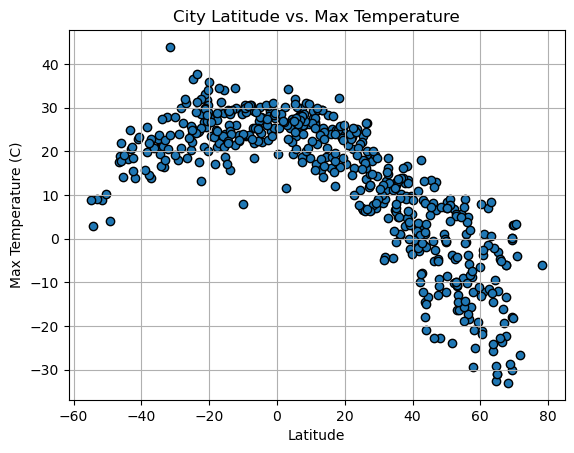

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

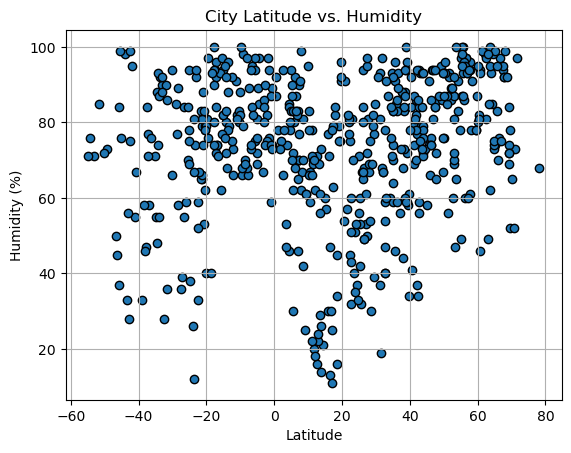

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

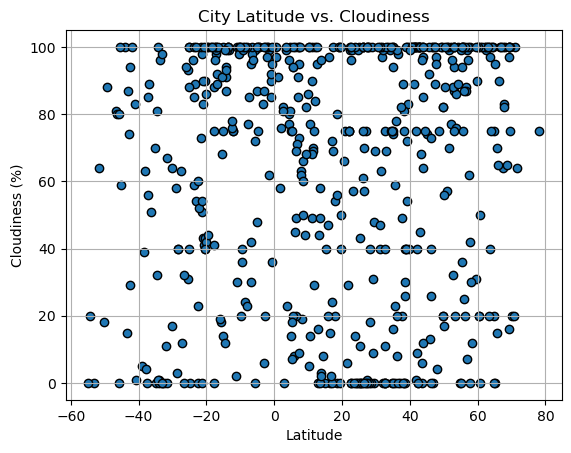

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

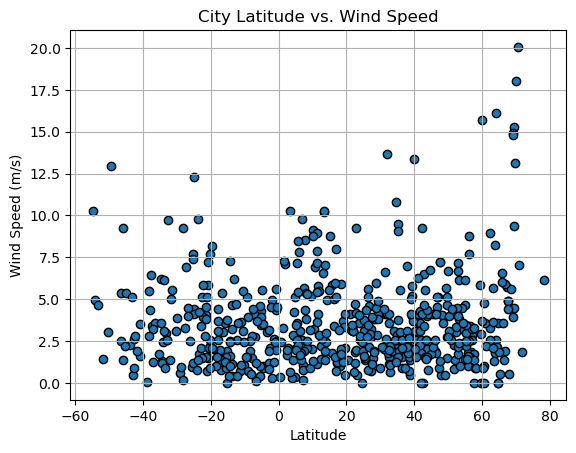

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)") # units were set to metric
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create function for linear regression. Adding in annotation coordinates as an argument to dynamically move the annotation location
def plot_linear_regression(x, y, xlabel, ylabel, title, annotate_loc):
  
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate the regression equation 
    reg_values = [slope * i + intercept for i in x]
    
    # Construct the line equation for annotation
    line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create plot
    plt.scatter(x, y)
    plt.plot(x, reg_values, "r-")  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate the regression line using coordinates from function argument
    plt.annotate(line_eq,annotate_loc,fontsize=15,color="red")
    
    # Print r-squared value and then show plot
    print(f"The r-squared value is: {r_value**2}")
    plt.show()
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,jackson,42.4165,-122.8345,17.93,34,0,9.26,US,2024-01-30 23:56:21-05:00
3,filingue,14.3521,3.3168,18.63,21,8,4.95,NE,2024-01-30 23:56:21-05:00
4,mersa matruh,31.3525,27.2453,8.11,81,40,4.12,EG,2024-01-30 23:56:22-05:00
5,iqaluit,63.7506,-68.5145,-25.73,62,40,8.23,CA,2024-01-30 23:56:22-05:00
6,nago,26.5881,127.9761,26.47,68,70,4.61,JP,2024-01-30 23:56:23-05:00


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,masterton,-40.9597,175.6575,22.71,55,83,1.59,NZ,2024-01-30 23:56:20-05:00
1,port-aux-francais,-49.3500,70.2167,4.07,73,88,12.95,TF,2024-01-30 23:56:20-05:00
7,caleta de carquin,-11.0925,-77.6267,23.82,82,100,3.65,PE,2024-01-30 23:56:23-05:00
9,san antonio de pale,-1.4014,5.6325,27.99,76,99,2.60,GQ,2024-01-30 23:56:25-05:00
11,greytown,-29.0642,30.5928,18.03,85,58,0.60,ZA,2024-01-30 23:56:25-05:00


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7314563356201159


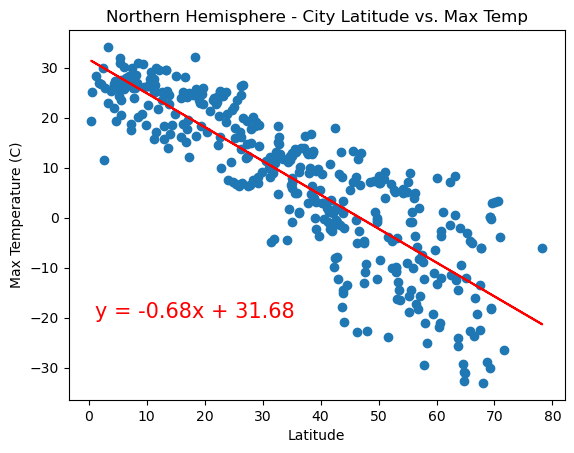

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (C)','Northern Hemisphere - City Latitude vs. Max Temp',(1,-20))

The r-squared value is: 0.2643541833620235


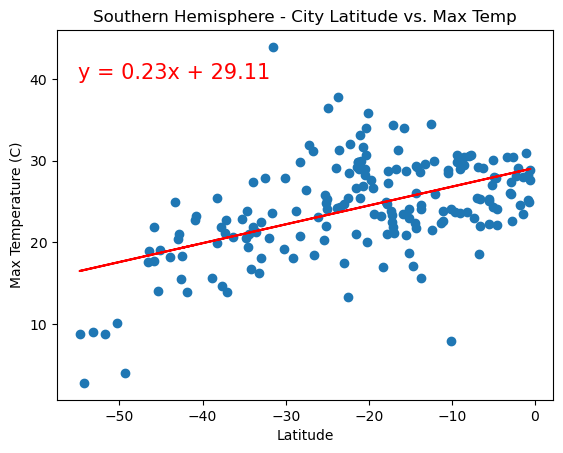

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 'Southern Hemisphere - City Latitude vs. Max Temp', (-55, 40))

**Discussion about the linear relationship:** Onene can see that as you get closer to the equator, the maximum temperature increases. Therefore one can infer that for any city location the farther away from the equator the colder the max temperature, or temperature in general, would be at that location.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.12573946322406118


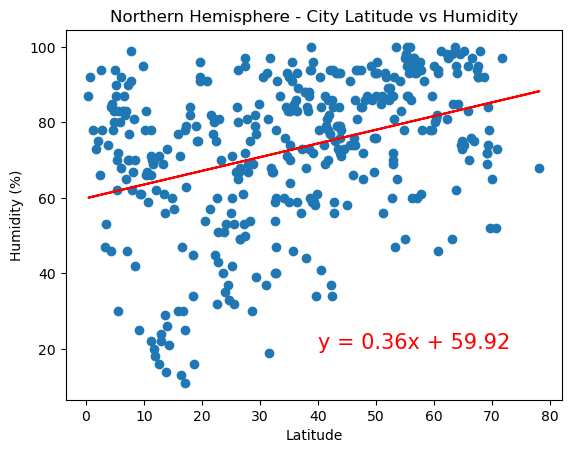

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)','Northern Hemisphere - City Latitude vs Humidity',(40,20))

The r-squared value is: 0.0876407832725344


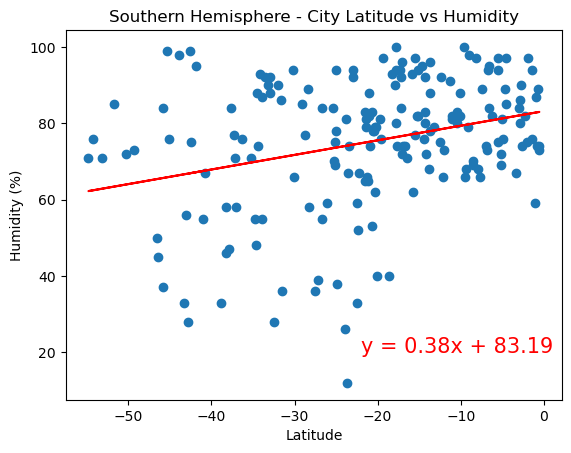

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)','Southern Hemisphere - City Latitude vs Humidity',(-22,20))

**Discussion about the linear relationship:** Despite attempting to perform a linear regression on Latitide vs Humidity, it doesnt appear to model a strong relationship. The points on the plot are very scattered compared to the line. Therefore we can say there is no linear correlation to between distance from equator and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.017096083261599018


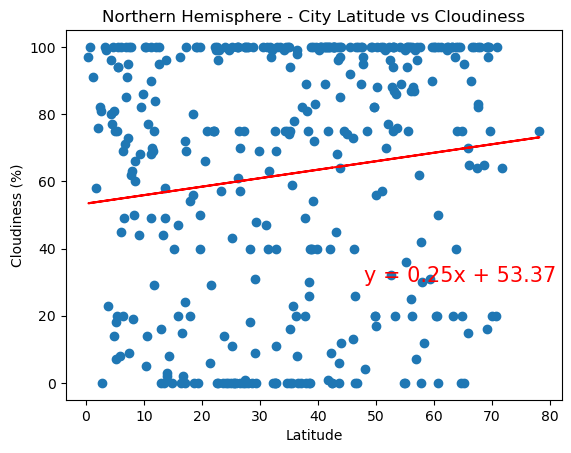

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)','Northern Hemisphere - City Latitude vs Cloudiness',(48,30))

The r-squared value is: 0.10848032902600523


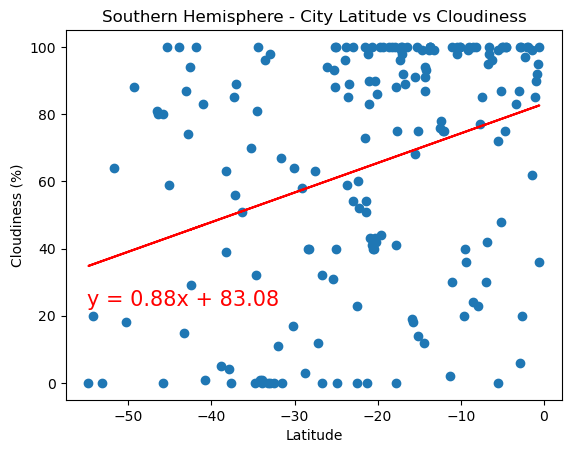

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)','Southern Hemisphere - City Latitude vs Cloudiness',(-55,23))

**Discussion about the linear relationship:** As with the previous plots about humidity, there appears to be no correlation to distance from equator and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.011277411171463726


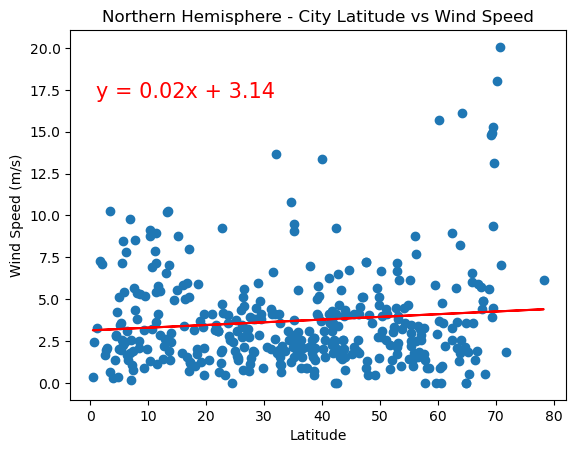

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)','Northern Hemisphere - City Latitude vs Wind Speed',(1,17))

The r-squared value is: 0.05157778862453281


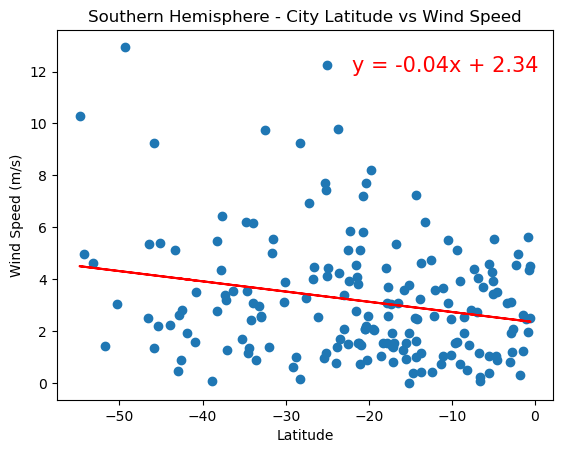

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)','Southern Hemisphere - City Latitude vs Wind Speed',(-22,12))

**Discussion about the linear relationship:** For the relationship betweem wind speed and the city latitude, I dont think you can necessarily say there is no correlation between these variables. To me, it looks like there is a slight horizontal correlation here especially in the northern hemisphere plot.